### 02_projecte_datasceince_sql

In [1]:
#Basicques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random
import re
import datetime

#SQL
import mysql.connector
from sqlalchemy import create_engine

#warnings
import warnings
warnings.filterwarnings('ignore')
#Options
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)
pd.set_option('display.expand_frame_repr', False)

#dire = 'C:\Users\Anton SL\OneDrive\Documentos\IT_Academics\Data_Science\DataScienceProject\plots'

# Grafic de pronostic
import scipy.stats as stats

### <span style=color:darkred>Scripts MySQL </span>

In [2]:
mydb = mysql.connector.connect(
  host="127.0.0.1",
  user="root",
  password="Zxcvbn123+-",
  database='cryptopunks')

print(mydb)

In [3]:
mycursor = mydb.cursor()

### <span style=color:darkred>Generem dos Dataframe per analitzar les característiques físiques </span>


#### Generem un datafram  amb tots els Cryptopunks i els atributs

In [4]:
Q1 = 'select mp.idpunks, pt.type, pt.accesories2 '
Q2 = ' from master_punks2 as mp inner join punks_accesories2 pt on mp.id = pt.id'
Q3 = ' order by idpunks asc;'

In [5]:
df_all = pd.read_sql(Q1+Q2 +Q3, mydb)

In [6]:
df_all

,idpunks,type,accesories2
0,0,Male,Smile
1,0,Male,Mohawk
2,1,Male,Smile
3,1,Male,Mohawk
4,2,Female,Wild Hair
...,...,...,...
27541,9998,Female,Wild White Hair
27542,9998,Female,Black Lipstick
27543,9998,Female,Clown Eyes Green
27544,9999,Female,Mohawk


In [7]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idpunks      27546 non-null  int64 
 1   type         27546 non-null  object
 2   accesories2  27546 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.7+ KB


In [8]:
#df_all.to_csv('df_all.csv')

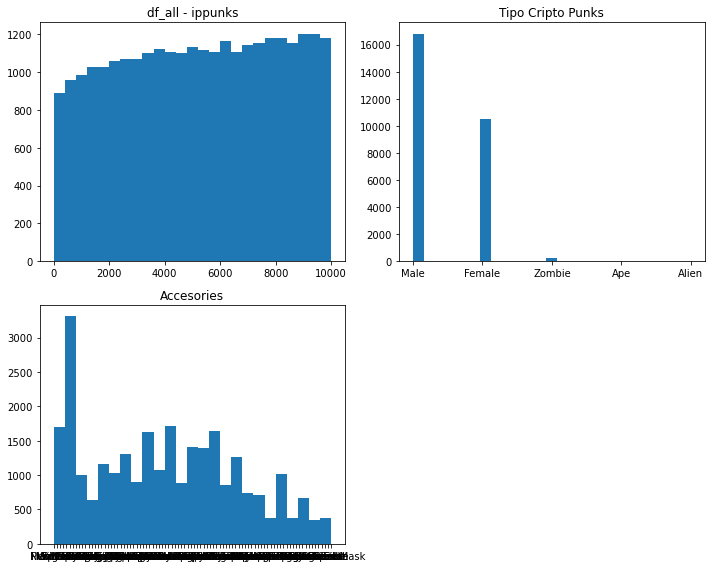

In [9]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df_all['idpunks'], bins=25)
plt.title('df_all - ippunks')


ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df_all['type'], bins=25)
plt.title('Tipo Cripto Punks')


ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_all['accesories2'], bins=25)
plt.title('Accesories')

plt.tight_layout()

#### Dataframe  dels atributs dels 1000 mes venuts

In [10]:
Q1 = 'select pa.id,pa.Type,pa.accesories2 '
Q2 = 'from historico_trans ht inner join punks_accesories2 pa on ht.cryptopunk_number = pa.id '
Q3 = 'where ht.trs_type="Sold" order by amount_dolars desc LIMIT 1000;'

In [11]:
Q1+Q2+Q3

'select pa.id,pa.Type,pa.accesories2 from historico_trans ht inner join punks_accesories2 pa on ht.cryptopunk_number = pa.id where ht.trs_type="Sold" order by amount_dolars desc LIMIT 1000;'

In [12]:


df_ts = pd.read_sql(Q1+Q2+Q3, mydb)

In [13]:
df_ts

,id,Type,accesories2
0,7804,Alien,Small Shades
1,7804,Alien,Pipe
2,7804,Alien,Cap Forward
3,3100,Alien,Headband
4,3011,Male,Small Shades
...,...,...,...
995,9760,Male,Smile
996,9760,Male,Eye Patch
997,7828,Male,Top Hat
998,7828,Male,Earring


In [14]:
df_ts.to_csv('df_ts.csv')

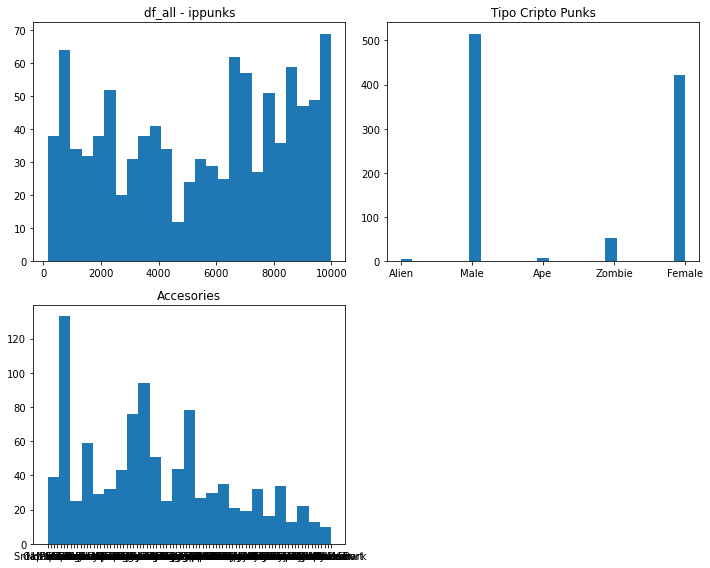

In [15]:
fig = plt.figure(figsize=(10,8))

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(df_ts['id'], bins=25)
plt.title('df_all - ippunks')


ax2 = fig.add_subplot(2, 2, 2)

ax2.hist(df_ts['Type'], bins=25)
plt.title('Tipo Cripto Punks')


ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_ts['accesories2'], bins=25)
plt.title('Accesories')

plt.tight_layout()

### <span style=color:darkred>-Gràfiques DataFrame creats Accesorie</span>


#### comparació dels 10 atributa més repetitis en dues Tbl.

In [16]:
df_all['accesories2'].value_counts(normalize=True).head(10)*100

Earring               8.923256
Cigarette             3.488710
Hot Lipstick          2.526683
Purple Lipstick       2.377841
Mole                  2.337908
Black Lipstick        2.239890
Nerd Glasses          2.076527
Horned Rim Glasses    1.942206
Big Shades            1.942206
Regular Shades        1.913163
Name: accesories2, dtype: float64

#### Gràfica amb els atributs de tots el Criptopunks

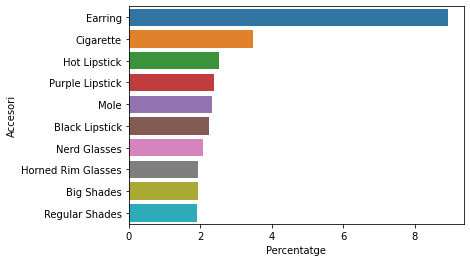

In [17]:
mydcit = dict(df_all['accesories2'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen1.png')

#### Gràfica amb els atributs de dels 1000 ms cars el Criptopunks

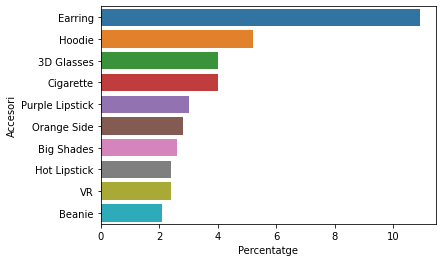

In [18]:
mydcit = dict(df_ts['accesories2'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen2.png')

### <span style=color:darkred>Análisis types </span>

#### entre tots els CryptoPunks


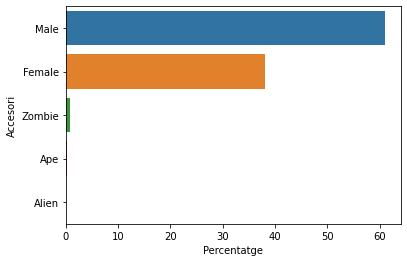

In [19]:
mydcit = dict(df_all['type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen3.png')

#### Entre el mes venuts 1000 mes venuts

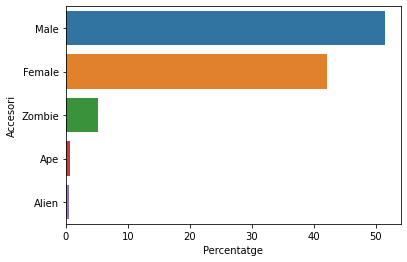

In [20]:
mydcit = dict(df_ts['Type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen4.png')

#### Entre el mes venuts 100 mes venuts

In [21]:
Q1 ='select pa.id,pa.Type,pa.accesories2 '
Q2 = 'from historico_trans ht inner join punks_accesories2 pa on ht.cryptopunk_number = pa.id '
Q3 = ' where ht.trs_type= "Sold" order by amount_dolars desc LIMIT 100;'

In [22]:
df_ts_100 = pd.read_sql(Q1+Q2+Q3, mydb)

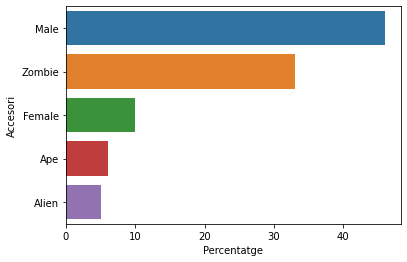

In [23]:
mydcit = dict(df_ts_100['Type'].value_counts(normalize=True).head(10)*100)
df = pd.DataFrame([[key, mydcit[key]] for key in mydcit.keys()], columns=['Accesori', 'Percentatge'])
sns.barplot(x='Percentatge',y='Accesori', data= df, orient='h')
plt.savefig('.\diagrama\imagen4.png')

Hi ha una diferencia important entre els 100 types mes venuts i els types de tota la base de dades. Entre els mes venuts Zombie esta en segona posició a diferència de Female que estaria en segoan posició entre tots els Criptopunks.

### <span style=color:darkred>Análisis número de Accesories </span>

#### Entre tots els CryptoPunks

In [24]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   idpunks      27546 non-null  int64 
 1   type         27546 non-null  object
 2   accesories2  27546 non-null  object
dtypes: int64(1), object(2)
memory usage: 645.7+ KB


In [25]:
Q1 = 'select  pa.id, pa.type, count( pa.count) as NumeroAccesorio '
Q2 = ' from punks_accesories2  pa group by pa.id, pa.Type; '

In [26]:
df_all = pd.read_sql(Q1 + Q2, mydb)
df_all

,id,type,NumeroAccesorio
0,0,Female,3
1,1,Male,2
2,2,Female,1
3,3,Male,3
4,4,Male,4
...,...,...,...
9995,9995,Female,2
9996,9996,Male,4
9997,9997,Zombie,2
9998,9998,Female,3


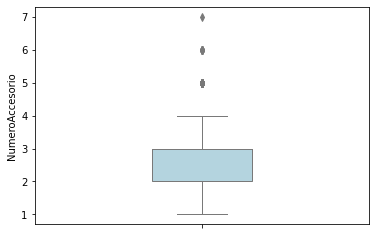

In [27]:
ax = sns.boxplot(y = df_all['NumeroAccesorio'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
plt.savefig('.\diagrama\imagen5.png')

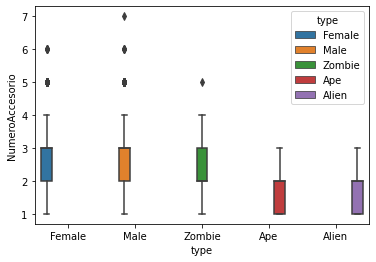

In [28]:
sns.boxplot(x='type', y= 'NumeroAccesorio', hue='type', 
               data=df_all[df_all.NumeroAccesorio > 0]);
plt.savefig('.\diagrama\imagen6.png')

#### Entre tots els mes venuts

In [29]:
Q1 = 'select  pa.id, pa.type, sum( pa.count) as NumeroAccesorio ' 
Q2 = ' from punks_accesories2  pa inner join topsales ts '
Q3 = ' on pa.id = ts.id group by pa.id, pa.type;'

In [30]:
df_ts = pd.read_sql(Q1+Q2+Q3, mydb)

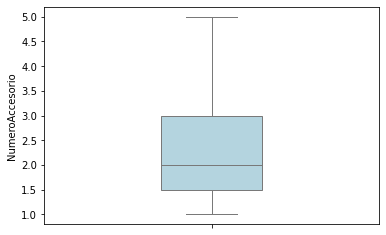

In [31]:
ax = sns.boxplot(y = df_ts['NumeroAccesorio'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
plt.savefig('.\diagrama\imagen7.png')

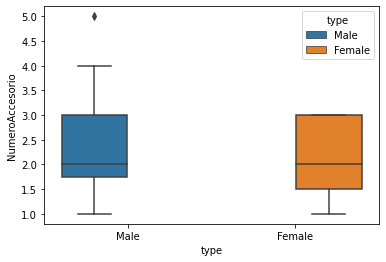

In [32]:
sns.boxplot(x='type', y= 'NumeroAccesorio', hue='type', 
               data=df_ts[df_ts.NumeroAccesorio > 0]);

plt.savefig('.\diagrama\imagen8.png')

### <span style=color:darkred>Análisis exploratori informació Rarity </span>

In [33]:
Q1 = 'select ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth ' 
Q2 = ' from master_punks2 mp inner join rarity ra '
Q3 = ' on mp.id = ra.id  inner join historico_trans ht on mp.id = ht.cryptopunk_number '
Q4 = ' group by ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth;'

In [34]:
df_rar = pd.read_sql(Q1+Q2+Q3, mydb)
df_rar

,transaccion_date,id,rarity,trs_type,amount_dolars,amount_eth
0,2020-11-30,1,0.094547,Transfer,0.00,0.000
1,2020-11-30,1,0.094547,Sold,36890.60,60.000
2,2020-11-30,1,0.094547,Bid,36890.60,60.000
3,2020-11-25,1,0.094547,Offered,45369.60,79.500
4,2020-11-23,1,0.094547,Bid withdrawn,30422.70,50.000
...,...,...,...,...,...,...
133778,2017-07-03,9999,0.058436,Bid,70.72,0.250
133779,2017-06-27,9999,0.058436,Bid,58.62,0.200
133780,2017-06-24,9999,0.058436,Bid,64.74,0.200
133781,2017-06-24,9999,0.058436,Bid,49.85,0.154


In [35]:
df_rar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133783 entries, 0 to 133782
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaccion_date  133783 non-null  object 
 1   id                133783 non-null  int64  
 2   rarity            133783 non-null  float64
 3   trs_type          133783 non-null  object 
 4   amount_dolars     133783 non-null  float64
 5   amount_eth        133783 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 6.1+ MB


In [36]:
df_rar.describe()

,id,rarity,amount_dolars,amount_eth
count,133783.000000,133783.000000,1.337830e+05,1.337830e+05
mean,5293.719785,0.094943,2.354671e+27,7.702324e+24
std,2768.368427,0.048427,8.612530e+29,2.817202e+27
min,1.000000,0.000200,0.000000e+00,0.000000e+00
25%,2976.000000,0.058457,0.000000e+00,0.000000e+00
50%,5331.000000,0.102444,2.489800e+02,1.000000e+00
75%,7668.000000,0.117059,3.834910e+04,2.000000e+01
max,9999.000000,0.681820,3.150150e+32,1.030430e+30


In [37]:
df_rar2= pd.DataFrame( df_rar[df_rar['trs_type']=='Sold'])

In [38]:
df_rar2.rarity.mean() , df_rar2.rarity.median()

(0.10213851144362737, 0.104054)

In [39]:
df_rar.rarity.mean(), df_rar.rarity.median()

(0.09494330171354078, 0.102444)

### <span style=color:darkred>Análisis rendimenty </span>

In [147]:
Q1 = 'select ht.transaccion_date,mp.id, pa2.type,ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth, ht.adj_close '
Q2 = ' from master_punks2 mp inner join rarity ra on mp.id = ra.id'
Q3 = ' inner join historico_trans ht on mp.id = ht.cryptopunk_number inner join punks_accesories2 pa2 on mp.id = pa2.id '
Q4 = ' where ht.trs_type ="Sold"' 
Q5 = ' group by ht.transaccion_date,mp.id, ra.rarity, ht.trs_type, ht.amount_dolars,ht.amount_eth '
Q6 = ' order by mp.id, ht.transaccion_date desc ;'

In [148]:
df_finance = pd.read_sql(Q1+Q2+Q3+Q4 +Q5, mydb)

In [149]:
df_finance

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240
...,...,...,...,...,...,...,...,...
12475,2017-11-28,9989,Female,0.021576,Sold,141.87,0.30,472.9020
12476,2021-03-20,9990,Male,0.173996,Sold,44409.60,24.50,1812.6300
12477,2021-02-08,9997,Zombie,0.008606,Sold,174644.00,99.99,1746.6200
12478,2021-03-03,9998,Female,0.054166,Sold,59882.40,38.00,1575.8500


In [150]:
df_finance['transaccion_date'] = pd.to_datetime(df_finance['transaccion_date'])

In [151]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaccion_date  12480 non-null  datetime64[ns]
 1   id                12480 non-null  int64         
 2   type              12480 non-null  object        
 3   rarity            12480 non-null  float64       
 4   trs_type          12480 non-null  object        
 5   amount_dolars     12480 non-null  float64       
 6   amount_eth        12480 non-null  float64       
 7   adj_close         12480 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 780.1+ KB


In [152]:
df_finance.isnull().sum()

transaccion_date    0
id                  0
type                0
rarity              0
trs_type            0
amount_dolars       0
amount_eth          0
adj_close           0
dtype: int64

#### Càlcul numero de venda i rendiment

In [153]:
 # pd.DataFrame( df_finance[df_finance['idmaster']==1])
mylista = list(df_finance.id.unique())
mylista

[1,
 14,
 33,
 53,
 89,
 116,
 118,
 124,
 138,
 139,
 141,
 143,
 155,
 160,
 161,
 168,
 169,
 173,
 195,
 203,
 240,
 241,
 249,
 257,
 259,
 260,
 264,
 273,
 280,
 281,
 283,
 285,
 287,
 291,
 294,
 299,
 318,
 322,
 328,
 329,
 332,
 335,
 338,
 339,
 340,
 341,
 342,
 344,
 346,
 352,
 353,
 355,
 365,
 368,
 376,
 381,
 382,
 383,
 384,
 385,
 402,
 404,
 406,
 407,
 410,
 411,
 416,
 422,
 426,
 430,
 431,
 435,
 441,
 445,
 446,
 447,
 449,
 453,
 457,
 460,
 465,
 470,
 471,
 473,
 483,
 485,
 486,
 488,
 490,
 494,
 497,
 501,
 504,
 505,
 506,
 507,
 509,
 510,
 512,
 516,
 518,
 522,
 526,
 534,
 535,
 538,
 544,
 547,
 548,
 549,
 550,
 553,
 561,
 563,
 564,
 568,
 573,
 577,
 578,
 586,
 588,
 589,
 591,
 593,
 599,
 604,
 605,
 608,
 610,
 613,
 615,
 616,
 617,
 618,
 620,
 622,
 627,
 628,
 638,
 639,
 641,
 642,
 648,
 660,
 661,
 665,
 668,
 669,
 675,
 678,
 680,
 682,
 685,
 686,
 688,
 698,
 702,
 703,
 706,
 709,
 717,
 719,
 721,
 729,
 730,
 735,
 741,
 742

In [154]:
df_1 = pd.DataFrame()
MyListaAnidada = []
i = 0

for elem in mylista:
    
    df_1 = pd.DataFrame( df_finance[df_finance['id']== elem ])
    mylista2 = (list(reversed (range(len(df_1)))))
    if len(df_1) == len(mylista2):
        for i in range(len(mylista2)):
            MyListaAnidada.append(mylista2[i])
        


In [155]:
df_finance2= pd.DataFrame(MyListaAnidada,columns=['Num_venta'])   
df_finance2

,Num_venta
0,2
1,1
2,0
3,2
4,1
...,...
12475,0
12476,0
12477,0
12478,1


In [156]:
df_finance = pd.concat([df_finance,df_finance2], axis=1)
df_finance.head(20)

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1
5,2017-07-14,14,Female,0.021557,Sold,179.70,0.90,199.6620,0
6,2017-07-10,33,Male,0.089991,Sold,109.83,0.51,215.3570,0
7,2021-02-19,53,Female,0.060174,Sold,43123.60,22.00,1960.1600,1
8,2021-02-01,53,Female,0.060174,Sold,27380.80,20.00,1369.0400,0
9,2020-09-06,89,Female,0.014377,Sold,7063.71,19.99,353.3620,2


In [157]:
df_finance['Num_venta'][2]

0

In [158]:
df_finance['Redimiento']= 0.0

for row in range(len(df_finance)):
    try:
        if df_finance['Num_venta'][row] == 0:
            df_finance['Redimiento'][row] == 0
        else:
            df_finance['Redimiento'][row] = df_finance['amount_dolars'][row ] / df_finance['amount_dolars'][row +1]
    except:
        pass
    
#(preu de venta/preu de compra) * 100

In [159]:
df_finance.head(20)

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2,7.171077
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1,44.917140
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0,0.000000
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2,0.651818
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1,1.991263
5,2017-07-14,14,Female,0.021557,Sold,179.70,0.90,199.6620,0,0.000000
6,2017-07-10,33,Male,0.089991,Sold,109.83,0.51,215.3570,0,0.000000
7,2021-02-19,53,Female,0.060174,Sold,43123.60,22.00,1960.1600,1,1.574958
8,2021-02-01,53,Female,0.060174,Sold,27380.80,20.00,1369.0400,0,0.000000
9,2020-09-06,89,Female,0.014377,Sold,7063.71,19.99,353.3620,2,1.606553


In [160]:
df_finance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12480 entries, 0 to 12479
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaccion_date  12480 non-null  datetime64[ns]
 1   id                12480 non-null  int64         
 2   type              12480 non-null  object        
 3   rarity            12480 non-null  float64       
 4   trs_type          12480 non-null  object        
 5   amount_dolars     12480 non-null  float64       
 6   amount_eth        12480 non-null  float64       
 7   adj_close         12480 non-null  float64       
 8   Num_venta         12480 non-null  int64         
 9   Redimiento        12480 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(2)
memory usage: 975.1+ KB


In [161]:
df_finance['Year'] = df_finance['transaccion_date'].dt.year
df_finance['Month'] = df_finance['transaccion_date'].dt.month
df_finance['YearMonth'] = df_finance['transaccion_date'].dt.strftime('%Y%m')

In [162]:
df_finance

,transaccion_date,id,type,rarity,trs_type,amount_dolars,amount_eth,adj_close,Num_venta,Redimiento,Year,Month,YearMonth
0,2020-11-30,1,Male,0.094547,Sold,36890.60,60.00,614.8430,2,7.171077,2020,11,202011
1,2019-04-06,1,Male,0.094547,Sold,5144.36,31.00,165.9470,1,44.917140,2019,4,201904
2,2017-06-26,1,Male,0.094547,Sold,114.53,0.42,272.6920,0,0.000000,2017,6,201706
3,2018-12-07,14,Female,0.021557,Sold,233.24,2.50,93.2946,2,0.651818,2018,12,201812
4,2017-07-17,14,Female,0.021557,Sold,357.83,1.85,193.4240,1,1.991263,2017,7,201707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12475,2017-11-28,9989,Female,0.021576,Sold,141.87,0.30,472.9020,0,0.000000,2017,11,201711
12476,2021-03-20,9990,Male,0.173996,Sold,44409.60,24.50,1812.6300,0,0.000000,2021,3,202103
12477,2021-02-08,9997,Zombie,0.008606,Sold,174644.00,99.99,1746.6200,0,0.000000,2021,2,202102
12478,2021-03-03,9998,Female,0.054166,Sold,59882.40,38.00,1575.8500,1,5.848119,2021,3,202103


<AxesSubplot:xlabel='YearMonth', ylabel='Redimiento'>

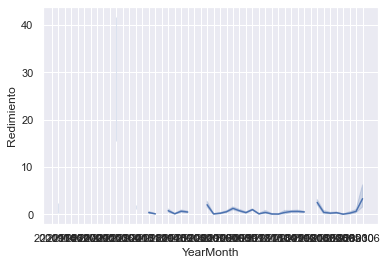

In [163]:
sns.lineplot(data=df_finance,x='YearMonth',y='Redimiento')

<AxesSubplot:xlabel='Year', ylabel='amount_dolars'>

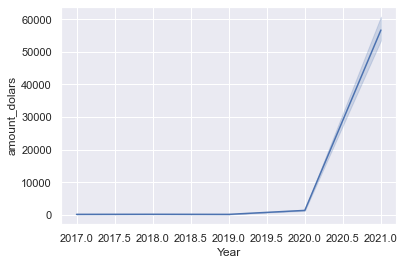

In [164]:
sns.lineplot(data=df_finance,x='Year',y='amount_dolars')

In [165]:
df_finance.to_csv('Arma.csv')

### <span style=color:darkred>Análisis rendimenty </span>

In [166]:
Q1 = 'select mp.idpunks, pt.type, pt.accesories2 '
Q2 = ' from master_punks2 as mp inner join punks_accesories2 pt on mp.id = pt.id'
Q3 = ' order by idpunks asc;'
df_all_attri = pd.read_sql(Q1+Q2 +Q3, mydb)

In [167]:
df_dummies = pd.DataFrame()

In [168]:
df_dummies = pd.get_dummies(df_all_attri['accesories2'])

In [169]:
df_dummies

,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,Dark Hair,Do-rag,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [170]:
df_all_attri=pd.concat([df_all_attri,df_dummies], axis=1)

In [171]:
df_all_attri

,idpunks,type,accesories2,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Male,Smile,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Male,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,Female,Wild Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,9998,Female,Wild White Hair,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,9998,Female,Black Lipstick,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,9998,Female,Clown Eyes Green,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,9999,Female,Mohawk,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df_all_attri.drop(['accesories2'], axis=1)

,idpunks,type,,3D Glasses,Bandana,Beanie,Big Beard,Big Shades,Black Lipstick,Blonde Bob,Blonde Short,Blue Eye Shadow,Buck Teeth,Cap,Cap Forward,Chinstrap,Choker,Cigarette,Classic Shades,Clown Eyes Blue,Clown Eyes Green,Clown Hair Green,Clown Nose,Cowboy Hat,Crazy Hair,...,Purple Hair,Purple Lipstick,Red Mohawk,Regular Shades,Rosy Cheeks,Shadow Beard,Shaved Head,Silver Chain,Small Shades,Smile,Spots,Straight Hair,Straight Hair Blonde,Straight Hair Dark,Stringy Hair,Tassle Hat,Tiara,Top Hat,VR,Vampire Hair,Vape,Welding Goggles,Wild Blonde,Wild Hair,Wild White Hair
0,0,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,Male,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27541,9998,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
27542,9998,Female,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27543,9998,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
27544,9999,Female,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [173]:
#df1 = df1.reset_index(level=1,drop=True).rename('accesories1')
